# Testing forward propagation
- [x] Dimensions for weights and biases are correctly created
- [x] The output shapes for each layer are correct

In [1]:
from neural_network import NeuralNetwork
import numpy as np
l1 = (64, 'relu')
l2 = (32, 'relu')
l3 = (16, 'relu')
l4 = (10, 'softmax')

num_inputs1 = 784
layers1 = [l1, l2, l3, l4]

nn1 = NeuralNetwork(num_inputs1, layers1)
nn1.summary()

inputs: 784 - neurons: 64
weights: (784, 64) - biases: (64,)

inputs: 64 - neurons: 32
weights: (64, 32) - biases: (32,)

inputs: 32 - neurons: 16
weights: (32, 16) - biases: (16,)

inputs: 16 - neurons: 10
weights: (16, 10) - biases: (10,)



In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_norm = x_train / 255.0
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], -1)

print(x_train_norm.shape)

(60000, 784)


In [3]:
nn1.forward_prop(x_train_norm)

layer 1 output: (60000, 64)
layer 2 output: (60000, 32)
layer 3 output: (60000, 16)
layer 4 output: (60000, 10)


## Testing with pre trained weights
- [x] Forward propagation result of Tensorflow model and Custom Neural Network is same

In [1]:
def create_confusion_matrix(pred, true, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(pred, true, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='PuBu')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

    plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras import models

pre_defined_model = models.load_model("./models/tf_model.h5")
print(pre_defined_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,020 (207.11 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


creating identical custom neural network

In [3]:
from neural_network import NeuralNetwork
import numpy as np
l1 = (64, 'relu')
l2 = (32, 'relu')
l3 = (16, 'relu')
l4 = (10, 'softmax')

num_inputs2 = 784
layers2 = [l1, l2, l3, l4]

nn2 = NeuralNetwork(num_inputs2, layers2)

setting the pre-trained weights to custom NN

In [4]:
for i, layer in enumerate(pre_defined_model.layers):
    weight, bias = layer.get_weights()
    nn2.layers[i].weight = weight
    nn2.layers[i].bias = bias

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_norm = x_train / 255.0
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], -1)

x_test_norm = x_test / 255.0
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], -1)

x_data = x_test_norm
y_data = y_test

Forward propagating on mnist dataset

In [6]:
pred = nn2.forward_prop(x_data)
print(pred.shape)

(10000, 10)


In [7]:
pred_ = np.argmax(pred, axis=1)

print(pred_.shape)
print(y_data.shape)

(10000,)
(10000,)


In [8]:
pred_tf = pre_defined_model.predict(x_data)
pred_tf_ = np.argmax(pred_tf, axis=1)
print(pred_tf.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
(10000, 10)


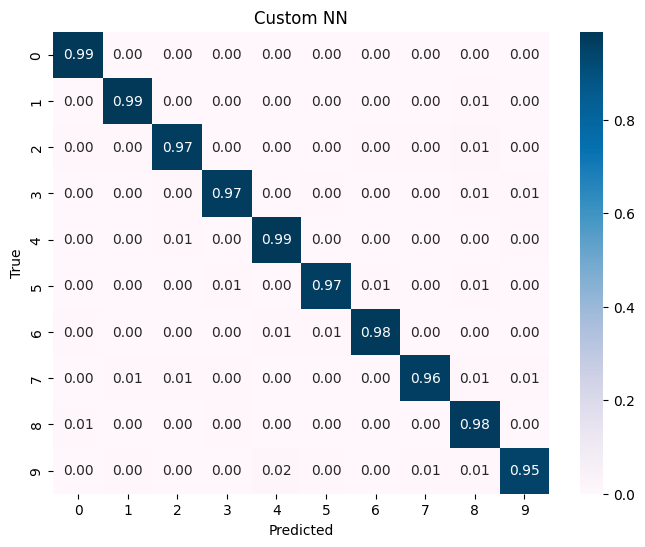

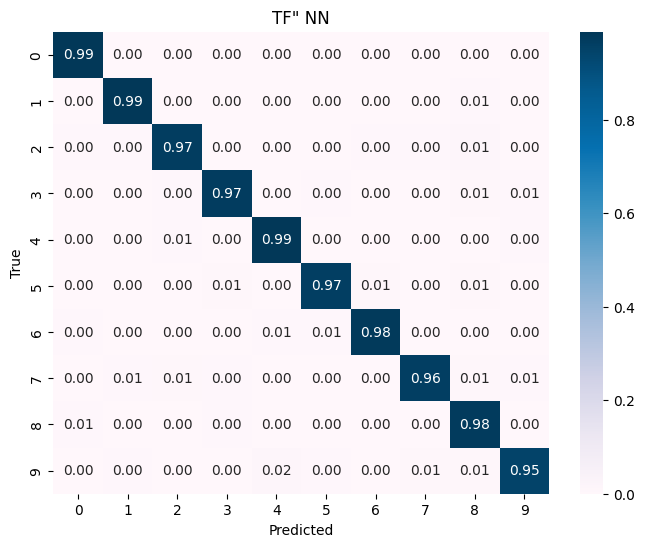

In [9]:
create_confusion_matrix(y_data, pred_, 'Custom NN')
create_confusion_matrix(y_data, pred_tf_, 'TF" NN')

# Softmax function

In [11]:
z_ = nn2.layers[-1].z
print(z_.shape)
print()

exp_z = np.exp(z_)
print(exp_z.shape)
print()

print(np.sum(exp_z, axis=1).shape)
print()

sum_ = np.expand_dims(np.sum(exp_z, axis=1), axis=-1)
print(sum_.shape)
print()

sum_ = np.sum(exp_z, axis=1, keepdims=True)
print(sum_.shape)
print()

softmaxZ = exp_z / sum_
print(softmaxZ.shape)

(10000, 10)

(10000, 10)

(10000,)

(10000, 1)

(10000, 1)

(10000, 10)


In [33]:
import numpy as np
x = np.array([
    [1,2,3,4,5],
    [1,2,3,4,5]
])

print(np.linalg.norm(x) / len(x))
print(np.linalg.norm(x, axis=0) / len(x))
print(np.linalg.norm(x.T, axis=1) / len(x))

print(np.sum(np.linalg.norm(x, axis=0)) / len(x))

5.244044240850758
[0.70710678 1.41421356 2.12132034 2.82842712 3.53553391]
[0.70710678 1.41421356 2.12132034 2.82842712 3.53553391]
10.606601717798213


In [35]:
import numpy as np
a = np.array([
    [1, 3, 4],
    [76, 321, 5],
    [77, 12, 89]
])

b = np.array([
    [6, 23, 1],
    [321, 4, 78],
    [74, 876, 96]
])

print(a.shape)
print(b.shape)

(3, 3)
(3, 3)


In [37]:
print(np.dot(a, b).shape)
print(np.dot(b, a).shape)

(3, 3)
(3, 3)


In [38]:
np.dot(a,b) - np.dot(b,a)

array([[   -566,   -3874,     391],
       [  97236,    4229,   17348],
       [ -63142, -202787,   -3663]])

In [45]:
a1 = np.array([
    [1, 2, 3],
    [1, 5, 7],
])

a2 = np.array([
    [0.9, 1.8, 2.92],
    [1, 4.75, 6.5]
])

print(a1.shape)
print(a2.shape)

(2, 3)
(2, 3)


In [46]:
diff = a1 - a2
print(diff.shape)
print(diff)

(2, 3)
[[0.1  0.2  0.08]
 [0.   0.25 0.5 ]]


In [49]:
dE_a = (1/len(a1)) * np.sum(a2 - a1, axis=0)

print(dE_a.shape)
print(dE_a)

(3,)
[-0.05  -0.225 -0.29 ]


# Testing Backpropagation
- [x] Train model on mnist data
- [x] Achieve reasonable predictions
- [x] Use custom trained weights on tf model to achieve same result
- [x] Train on train dataset & predict on test dataset
- [ ] Add learning rate optimizer

In [1]:
def create_confusion_matrix(pred, true, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(pred, true, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='PuBu')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

    plt.show()

In [2]:
import numpy as np
from neural_network import NeuralNetwork

l1 = (20, 'relu')
l2 = (15, 'relu')
l3 = (10, 'relu')
l4 = (10, 'softmax')

num_inputs3 = 784
layers3 = [l1, l2, l3, l4]

nn3 = NeuralNetwork(num_inputs3, layers3)
nn3.summary()

inputs: 784 - neurons: 20
inputs: 20 - neurons: 15
inputs: 15 - neurons: 10
inputs: 10 - neurons: 10


In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_norm = x_train / 255.0
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], -1)

x_test_norm = x_test / 255.0
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], -1)

x_data = x_train_norm
y_data = y_train

y_data = np.zeros((y_train.size, y_train.max() + 1))
y_data[np.arange(y_train.size), y_train] = 1

In [4]:
print(x_data.shape)
print(y_data.shape)

(60000, 784)
(60000, 10)


In [5]:
nn3.fit(x_data, y_data, 20, 0.01, 32)

loss: 0.06068109662061698 - accuracy: 0.46576666666666666
loss: 0.025557804114872622 - accuracy: 0.8321166666666666
loss: 0.01685128656778885 - accuracy: 0.8888
loss: 0.01414967376929716 - accuracy: 0.9061333333333333
loss: 0.0125156654626222 - accuracy: 0.9178833333333334
loss: 0.011340923646116021 - accuracy: 0.9262833333333333
loss: 0.010436677988416429 - accuracy: 0.9324166666666667
loss: 0.0097196601872207 - accuracy: 0.9372333333333334
loss: 0.009112749525842586 - accuracy: 0.94115
loss: 0.008631747101147912 - accuracy: 0.9442666666666667


In [6]:
nn3.fit(x_data, y_data, 100, 0.001, 32)

loss: 0.008303152655766444 - accuracy: 0.94665
loss: 0.008077193707140034 - accuracy: 0.9484333333333334
loss: 0.007891260785898177 - accuracy: 0.9498
loss: 0.007718936486484549 - accuracy: 0.9512833333333334
loss: 0.007557882344380773 - accuracy: 0.95235
loss: 0.007405245783636255 - accuracy: 0.9538666666666666
loss: 0.007262571335234894 - accuracy: 0.9547333333333333
loss: 0.007128627156401355 - accuracy: 0.9556333333333333
loss: 0.0070033299811055015 - accuracy: 0.9565166666666667
loss: 0.006884435532846407 - accuracy: 0.9575666666666667


In [7]:
pred = nn3.forward_prop(x_test_norm)

In [8]:
nn3.calculate_loss(np.argmax(pred, axis=1), y_test)

0.8552

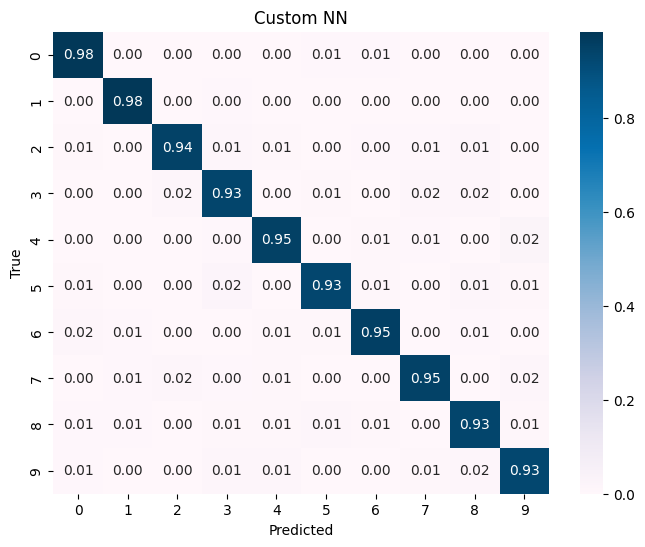

In [9]:
#y_data_ = np.argmax(y_data, axis=1)
pred_ = np.argmax(pred, axis=1)
create_confusion_matrix(y_test, pred_, 'Custom NN')

In [10]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,285 (63.61 KB)

 Trainable params: 16,285 (63.61 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
for tf_layer, my_layer in zip(model.layers, nn3.layers):
    tf_weight, tf_bias = tf_layer.get_weights()
    
    print(f'{my_layer.weight.shape} - {my_layer.bias.shape}')
    print(f'{tf_weight.shape} - {tf_bias.shape}')
    print()

    tf_layer.set_weights([my_layer.weight, my_layer.bias])
    

(784, 20) - (20,)
(784, 20) - (20,)

(20, 15) - (15,)
(20, 15) - (15,)

(15, 10) - (10,)
(15, 10) - (10,)

(10, 10) - (10,)
(10, 10) - (10,)



In [12]:
predtf = model.predict(x_test_norm)
predtf.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(10000, 10)

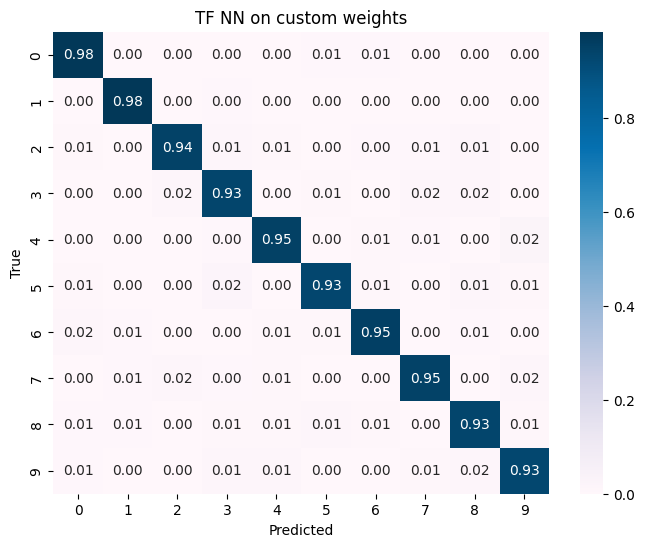

In [13]:
#y_data_ = np.argmax(y_data, axis=1)
predtf_ = np.argmax(predtf, axis=1)
create_confusion_matrix(y_test, predtf_, 'TF NN on custom weights')